# Introduction: A Long-only Strategy based on Price & Volume Data

## Getting the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
data = pd.read_csv("bitcoin.csv", parse_dates = ["Date"], index_col = "Date")
data

,Open,High,Low,Close,Volume
Date,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36168 entries, 2017-08-17 04:00:00 to 2021-10-07 09:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    36168 non-null  float64
 1   High    36168 non-null  float64
 2   Low     36168 non-null  float64
 3   Close   36168 non-null  float64
 4   Volume  36168 non-null  float64
dtypes: float64(5)
memory usage: 1.7 MB


In [5]:
data = data[["Close", "Volume"]].copy()

In [6]:
data

,Close,Volume
Date,,
2017-08-17 04:00:00,4308.83,47.181009
2017-08-17 05:00:00,4315.32,23.234916
2017-08-17 06:00:00,4324.35,7.229691
2017-08-17 07:00:00,4349.99,4.443249
2017-08-17 08:00:00,4360.69,0.972807
...,...,...
2021-10-07 05:00:00,54735.76,2251.122020
2021-10-07 06:00:00,54534.16,1783.004260
2021-10-07 07:00:00,54755.92,4163.431360


## Financial Data Analysis / Visual Inspection

In [ ]:
data

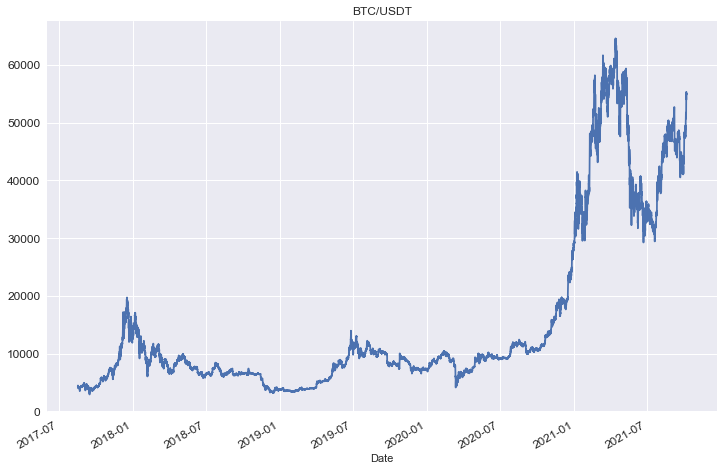

In [7]:
data.Close.plot(figsize = (12, 8), title = "BTC/USDT", fontsize = 12)
plt.show()

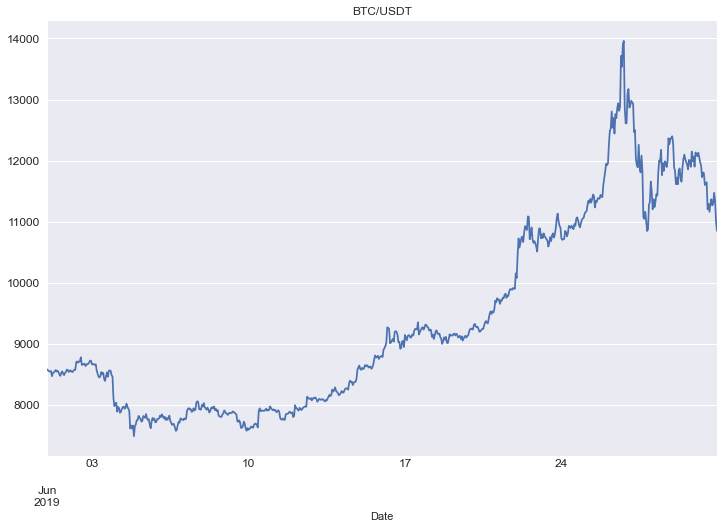

In [8]:
data.Close.loc["2019-06"].plot(figsize = (12, 8), title = "BTC/USDT", fontsize = 12)
plt.show()

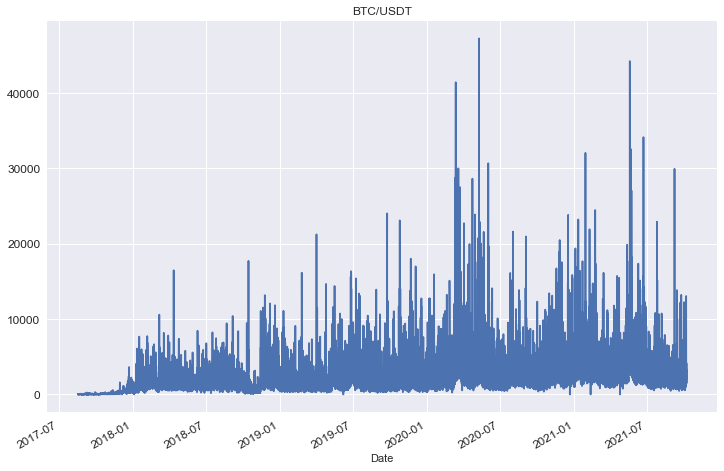

In [9]:
data.Volume.plot(figsize = (12, 8), title = "BTC/USDT", fontsize = 12)
plt.show()

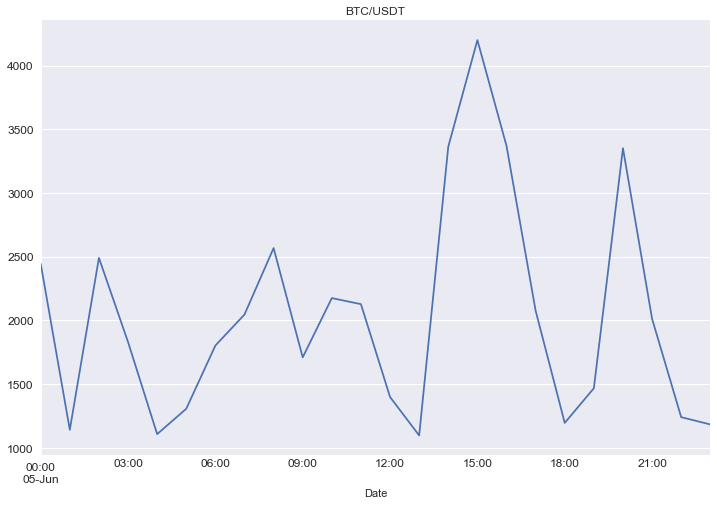

In [10]:
data.Volume.loc["2019-06-05"].plot(figsize = (12, 8), title = "BTC/USDT", fontsize = 12)
plt.show()

In [11]:
data["returns"] = np.log(data.Close.div(data.Close.shift(1)))

In [12]:
data.describe()

,Close,Volume,returns
count,36168.000000,36168.000000,36167.000000
mean,15211.287479,2121.344201,0.000070
std,14918.059912,2211.660869,0.009669
min,2919.000000,0.000000,-0.201033
25%,6619.987500,910.157520,-0.002955
50%,9110.620000,1551.676864,0.000139
75%,13411.242500,2603.584828,0.003258
max,64577.260000,47255.762685,0.160280


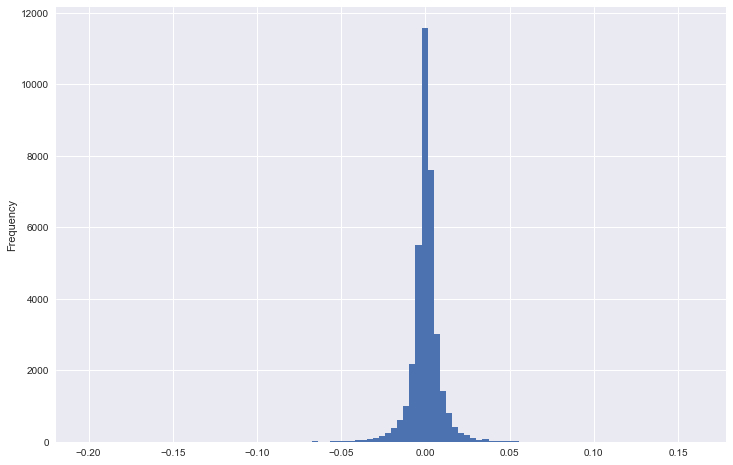

In [13]:
data.returns.plot(kind = "hist", bins = 100, figsize = (12,8))
plt.show()

In [ ]:
data.returns.nlargest(10)

In [ ]:
data.returns.nsmallest(10)

## A simple Buy and Hold "Strategy"

Assumption: Invest 1 USD(T) in BTC on 2017-08-17 and hold until 2021-10-07 (no further trades).

In [14]:
data

,Close,Volume,returns
Date,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505
2017-08-17 06:00:00,4324.35,7.229691,0.002090
2017-08-17 07:00:00,4349.99,4.443249,0.005912
2017-08-17 08:00:00,4360.69,0.972807,0.002457
...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690
2021-10-07 07:00:00,54755.92,4163.431360,0.004058


In [15]:
data.Close / data.Close[0]

Date
2017-08-17 04:00:00     1.000000
2017-08-17 05:00:00     1.001506
2017-08-17 06:00:00     1.003602
2017-08-17 07:00:00     1.009552
2017-08-17 08:00:00     1.012036
                         ...    
2021-10-07 05:00:00    12.703161
2021-10-07 06:00:00    12.656373
2021-10-07 07:00:00    12.707839
2021-10-07 08:00:00    12.657334
2021-10-07 09:00:00    12.531360
Name: Close, Length: 36168, dtype: float64

In [16]:
data.returns.sum()

2.528234304212195

In [27]:
multiple = np.exp(data.returns.sum())
multiple

12.531360021165671

In [18]:
data["creturns"] = data.returns.cumsum().apply(np.exp) # Normalized Prices with Base Value 1

In [19]:
data

,Close,Volume,returns,creturns
Date,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036
...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839


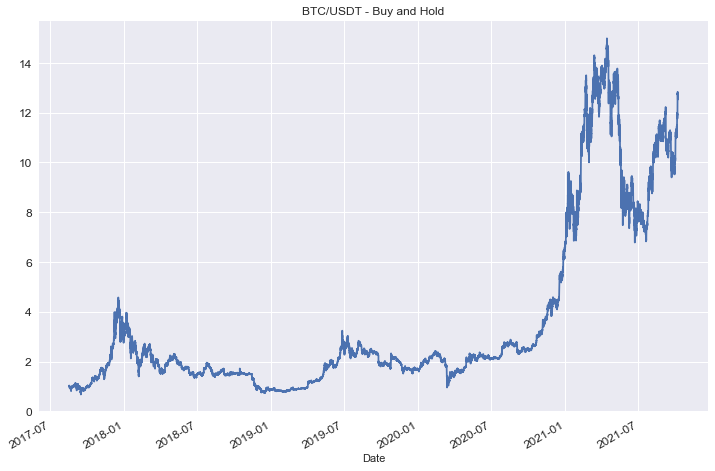

In [20]:
data.creturns.plot(figsize = (12, 8), title = "BTC/USDT - Buy and Hold", fontsize = 12)
plt.show()

## Performance Measurement

In [ ]:
data

__mean return and risk__

In [28]:
mu = data.returns.mean()
mu

6.990445168833971e-05

In [29]:
std = data.returns.std()
std

0.009669001511177732

__annualized mean return and risk__

In [30]:
number_of_periods = 24 * 365.25
number_of_periods

8766.0

In [31]:
ann_mean = mu * number_of_periods
ann_mean

0.6127824234999859

In [32]:
ann_std = std * np.sqrt(number_of_periods)
ann_std

0.9052788232893756

__CAGR__

In [33]:
cagr = np.exp(ann_mean) - 1
cagr

0.8455593891678417

__Risk-adjusted Return__ ("Sharpe Ratio")

In [34]:
ann_mean / ann_std

0.6768991030557973

In [35]:
cagr / ann_std

0.9340319992192677

## Preparing the Data for the Trading Strategy

In [ ]:
data

__Adding the Feature "Change in Trading Volume (log)"__

In [21]:
data["vol_ch"] = np.log(data.Volume.div(data.Volume.shift(1)))
data

/Users/manaadvice/opt/anaconda3/envs/binance_trading/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Close,Volume,returns,creturns,vol_ch
Date,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955
...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040


__Data Cleaning (removing outliers)__

In [22]:
data.vol_ch.nsmallest(20)

Date
2019-06-07 21:00:00        -inf
2020-12-21 14:00:00        -inf
2021-02-11 03:00:00        -inf
2021-04-25 04:00:00   -5.644090
2018-01-04 03:00:00   -5.428025
2019-06-07 20:00:00   -4.780619
2017-08-19 23:00:00   -3.801014
2017-08-20 09:00:00   -3.782857
2017-08-26 04:00:00   -3.470297
2017-12-04 06:00:00   -3.178488
2017-09-24 21:00:00   -2.749294
2017-08-21 09:00:00   -2.643555
2017-08-19 19:00:00   -2.357538
2020-06-09 01:00:00   -2.157645
2017-08-20 03:00:00   -2.106886
2018-10-06 03:00:00   -2.072737
2017-09-12 20:00:00   -1.948525
2019-10-13 21:00:00   -1.905406
2017-10-07 04:00:00   -1.901772
2020-03-04 09:00:00   -1.841755
Name: vol_ch, dtype: float64

In [23]:
data.vol_ch.nlargest(20)

Date
2019-06-07 22:00:00         inf
2020-12-21 18:00:00         inf
2021-02-11 05:00:00         inf
2018-01-04 05:00:00    5.256246
2021-04-25 08:00:00    5.051831
2017-08-20 00:00:00    3.794985
2017-08-26 05:00:00    3.428566
2017-08-20 11:00:00    2.904046
2017-10-12 00:00:00    2.884007
2017-12-04 07:00:00    2.851238
2019-07-27 10:00:00    2.808519
2017-08-20 15:00:00    2.779948
2019-12-16 18:00:00    2.658757
2017-08-20 05:00:00    2.585916
2019-09-06 17:00:00    2.579215
2018-04-12 11:00:00    2.562466
2020-06-10 18:00:00    2.537417
2018-10-15 05:00:00    2.525149
2019-01-19 10:00:00    2.512394
2019-07-28 22:00:00    2.490934
Name: vol_ch, dtype: float64

In [24]:
data.loc[data.vol_ch > 3, "vol_ch"] = np.nan
data.loc[data.vol_ch < -3, "vol_ch"] = np.nan

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36168 entries, 2017-08-17 04:00:00 to 2021-10-07 09:00:00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     36168 non-null  float64
 1   Volume    36168 non-null  float64
 2   returns   36167 non-null  float64
 3   creturns  36167 non-null  float64
 4   vol_ch    36150 non-null  float64
dtypes: float64(5)
memory usage: 2.7 MB


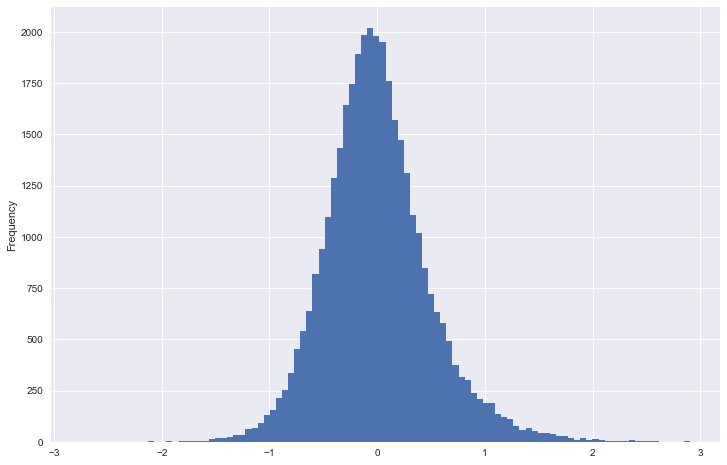

In [26]:
data.vol_ch.plot(kind = "hist", bins = 100, figsize = (12,8))
plt.show()

In [ ]:
data

## Explanatory Data Analysis: Financial Returns and Trading Volume (1)

__Question 1: Is there a relationship between price changes and volume changes?__ <br>
(e.g. rapid Increase in Trading Volume triggers extreme Price changes) 

In [ ]:
data

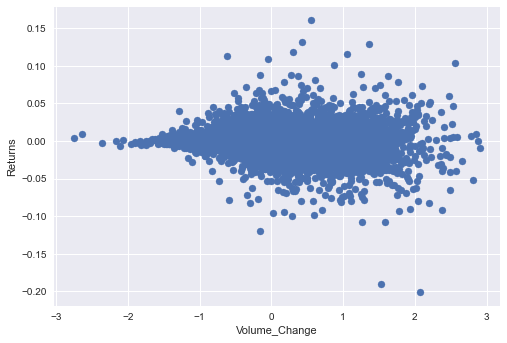

In [38]:
plt.scatter(x = data.vol_ch, y = data.returns)
plt.xlabel("Volume_Change")
plt.ylabel("Returns")
plt.show()

__Discretize columns returns and vol_ch: Sort and reorganize each in 10 equal sized buckets__

In [39]:
pd.qcut(data.returns, q = 10)

Date
2017-08-17 04:00:00                   NaN
2017-08-17 05:00:00    (0.00119, 0.00245]
2017-08-17 06:00:00    (0.00119, 0.00245]
2017-08-17 07:00:00    (0.00437, 0.00823]
2017-08-17 08:00:00    (0.00245, 0.00437]
                              ...        
2021-10-07 05:00:00    (-0.00781, -0.004]
2021-10-07 06:00:00    (-0.004, -0.00216]
2021-10-07 07:00:00    (0.00245, 0.00437]
2021-10-07 08:00:00    (-0.004, -0.00216]
2021-10-07 09:00:00    (-0.202, -0.00781]
Name: returns, Length: 36168, dtype: category
Categories (10, interval[float64, right]): [(-0.202, -0.00781] < (-0.00781, -0.004] < (-0.004, -0.00216] < (-0.00216, -0.000935] ... (0.00119, 0.00245] < (0.00245, 0.00437] < (0.00437, 0.00823] < (0.00823, 0.16]]

In [40]:
data["ret_cat"] = pd.qcut(data.returns, q = 10, labels = [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])

In [41]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat
Date,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3
...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3


In [42]:
data.ret_cat.value_counts()

-5    3617
-4    3617
-2    3617
-1    3617
2     3617
4     3617
5     3617
-3    3616
1     3616
3     3616
Name: ret_cat, dtype: int64

In [43]:
data["vol_cat"] = pd.qcut(data.vol_ch, q = 10, labels = [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])

In [44]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat
Date,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5
...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5


In [45]:
matrix = pd.crosstab(data.vol_cat, data.ret_cat)
matrix

ret_cat,-5,-4,-3,-2,-1,1,2,3,4,5
vol_cat,,,,,,,,,,
-5,142,292,378,394,446,487,474,414,370,218
-4,193,288,407,398,433,436,447,394,374,245
-3,196,301,393,448,432,455,426,386,344,234
-2,229,346,390,429,433,427,436,351,310,264
-1,227,324,419,423,426,427,395,359,338,277
1,285,391,366,422,392,399,338,382,339,301
2,319,397,364,378,355,377,338,390,362,335
3,398,388,374,323,337,306,360,371,373,385
4,569,487,300,272,253,198,256,329,454,497


In [50]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
sns.heatmap(matrix, cmap = "RdYlBu_r", annot = True, robust = True, fmt = ".0f")
plt.show()

__-> Extreme increases in Trading Volume trigger extreme (positive and negative) returns.__ <br>
__-> Low to moderate changes in the Trading Volume occur frequently with low to moderate returns__.

## Explanatory Data Analysis: Financial Returns and Trading Volume (2)

__Question 2: Can we use return/vol_ch clusters to (partly) forecast future returns?__ <br>
(e.g. Cluster 5/5 is a strong momentum signal -> prices will further rise in the near future) 

In [ ]:
data

In [47]:
data.vol_cat.shift()

Date
2017-08-17 04:00:00    NaN
2017-08-17 05:00:00    NaN
2017-08-17 06:00:00     -5
2017-08-17 07:00:00     -5
2017-08-17 08:00:00     -4
                      ... 
2021-10-07 05:00:00     -1
2021-10-07 06:00:00      4
2021-10-07 07:00:00     -2
2021-10-07 08:00:00      5
2021-10-07 09:00:00     -5
Name: vol_cat, Length: 36168, dtype: category
Categories (10, int64): [-5 < -4 < -3 < -2 ... 2 < 3 < 4 < 5]

In [48]:
matrix = pd.crosstab(data.vol_cat.shift(), data.ret_cat.shift(),
                     values = data.returns, aggfunc = np.mean)
matrix

ret_cat,-5,-4,-3,-2,-1,1,2,3,4,5
vol_cat,,,,,,,,,,
-5,0.004261,0.000484,-0.000479,0.000831,-0.000318,-0.000067,-0.000372,0.000026,-0.000246,0.000185
-4,0.002740,-0.000697,0.000015,-0.000135,-0.000025,0.000337,-0.000011,0.000257,-0.001055,-0.004235
-3,-0.000658,0.001505,0.000234,-0.000572,-0.000003,0.000179,-0.000277,-0.000092,0.000019,-0.000909
-2,0.003566,0.000328,-0.000440,0.000449,0.000092,-0.000517,-0.000812,0.000129,-0.000508,-0.000715
-1,-0.001165,0.001731,0.000713,0.000034,-0.000225,-0.000012,-0.000544,-0.000124,0.000196,-0.001321
1,0.001398,-0.000612,0.000845,-0.000018,0.000559,-0.000516,0.000030,-0.000429,-0.000024,-0.000360
2,0.000818,0.000331,-0.000028,0.000785,-0.000476,0.000207,0.000138,-0.000014,0.000073,0.000219
3,0.001445,-0.000156,0.000322,0.000101,-0.000215,0.000140,0.000302,0.000232,-0.000231,0.000589
4,0.000964,0.000152,-0.000551,0.000856,-0.000099,-0.000772,-0.000014,-0.000061,0.000023,-0.000403


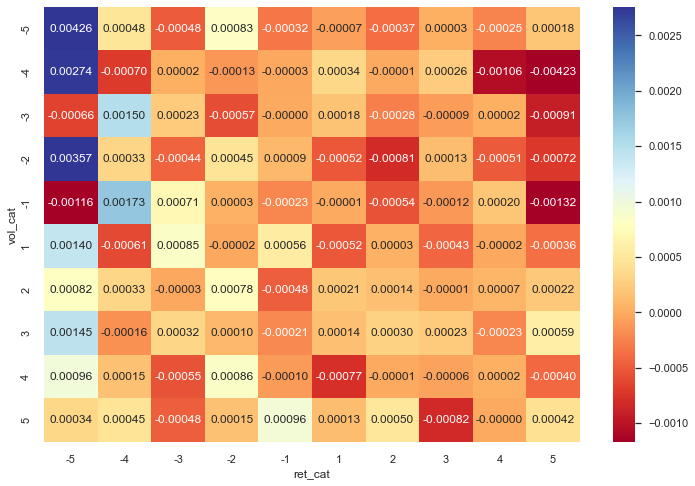

In [51]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
sns.heatmap(matrix, cmap = "RdYlBu", annot = True, robust = True, fmt = ".5f")
plt.show()

__-> Extremely High (positive) returns and Decreases in Volume is a Contrarian (mean-reverting) signal -> prices will fall.__ <br>
__-> Extremely Low (negative) returns and Decreases in Volume is a Contrarian (mean-reverting) signal -> prices will rise.__

## Formulating a Long-only Price/Volume Trading Strategy

__Plan__: Make Use of the _"Extremely High (positive) returns and Decreases in Volume"_ Cluster (falling prices):

__Implementation__: 
- Buy BTC/USDT in the Spot market and hold...
- ...until there is a signal to sell -> sell and go neutral.
- Buy back when the signal to sell has disappeared.

In [ ]:
data

In [52]:
data["position"] = 1 # Trading position -> long(1) for all bars: Buy-and-Hold
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position
Date,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,1
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1
...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4,1
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2,1
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5,1


__Sell and go Neutral (position = 0) if returns are very high (cond1) and vol_ch is negative (cond2)__

In [53]:
# getting returns threshold for very high returns (>= 90th percentile)
return_thresh = np.percentile(data.returns.dropna(), 90)
return_thresh

0.008231867023808183

In [54]:
cond1 = data.returns >= return_thresh
cond1

Date
2017-08-17 04:00:00    False
2017-08-17 05:00:00    False
2017-08-17 06:00:00    False
2017-08-17 07:00:00    False
2017-08-17 08:00:00    False
                       ...  
2021-10-07 05:00:00    False
2021-10-07 06:00:00    False
2021-10-07 07:00:00    False
2021-10-07 08:00:00    False
2021-10-07 09:00:00    False
Name: returns, Length: 36168, dtype: bool

In [55]:
# getting vol_ch thresholds for (moderate) Volume Decreases (between 5th and 20th percentile)
volume_thresh = np.percentile(data.vol_ch.dropna(), [5, 20])
volume_thresh

array([-0.72895253, -0.37604441])

In [56]:
cond2 = data.vol_ch.between(volume_thresh[0], volume_thresh[1])
cond2

Date
2017-08-17 04:00:00    False
2017-08-17 05:00:00     True
2017-08-17 06:00:00    False
2017-08-17 07:00:00     True
2017-08-17 08:00:00    False
                       ...  
2021-10-07 05:00:00    False
2021-10-07 06:00:00    False
2021-10-07 07:00:00    False
2021-10-07 08:00:00     True
2021-10-07 09:00:00    False
Name: vol_ch, Length: 36168, dtype: bool

In [57]:
data.loc[cond1 & cond2, "position"] = 0

In [58]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position
Date,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,1
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1
...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4,1
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2,1
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5,1


In [59]:
data.position.value_counts()

1    35804
0      364
Name: position, dtype: int64

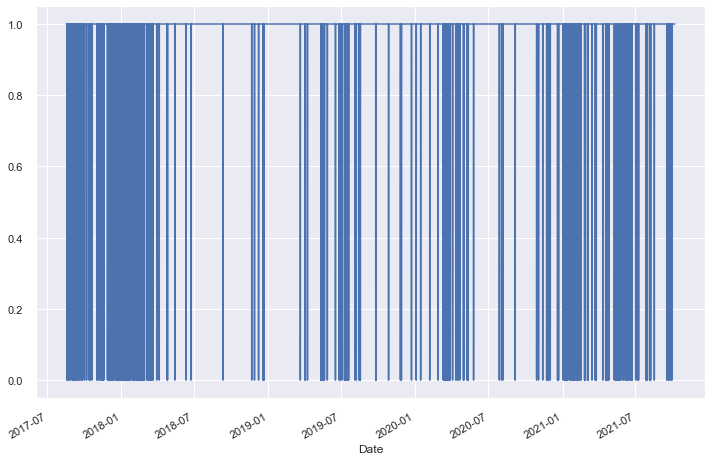

In [60]:
data.loc[:, "position"].plot(figsize = (12 , 8))
plt.show()

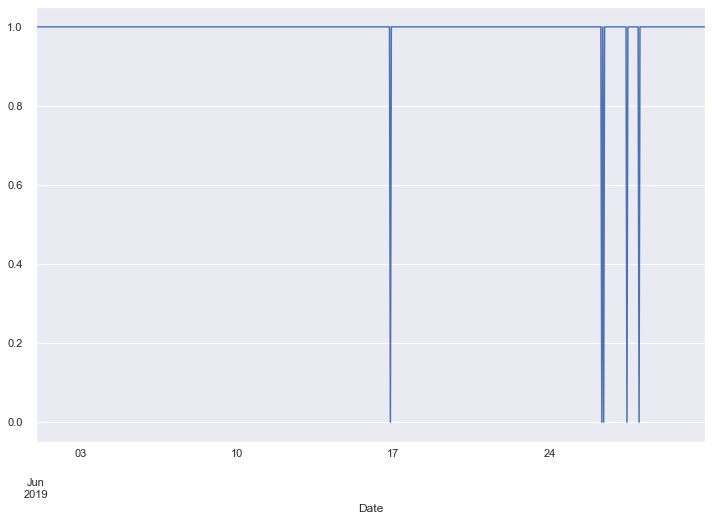

In [61]:
data.loc["2019-06", "position"].plot(figsize = (12 , 8))
plt.show()

## Strategy Backtest

In [62]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position
Date,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,1
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1
...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4,1
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2,1
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5,1


In [ ]:
# position to take for the next bar - use shift(1)
data["strategy"] = data.position.shift(1) * data["returns"]
data

In [ ]:
data.loc["2017-08-19"]

In [ ]:
data[["returns", "strategy"]].sum().apply(np.exp) # multiple for buy-and-hold and strategy

In [ ]:
# normalized price with base = 1 for strategy
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp) 

In [ ]:
data

In [ ]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8), fontsize = 12)
plt.show()

In [ ]:
tp_year = 24 * 365.25  # 1h trading periods per year
tp_year

In [ ]:
ann_mean = data[["returns", "strategy"]].mean() * tp_year # annualized returns
ann_mean

In [ ]:
ann_std = data[["returns", "strategy"]].std() * np.sqrt(tp_year) # annualized std
ann_std

In [ ]:
sharpe = (np.exp(ann_mean) - 1) / ann_std
sharpe

Great, but we still ignore:
- __Trading Costs__
- __Parameter Optimization__
- __Forward Testing__ (to avoid/remove data snooping and the lookahead bias)

## Trading Costs

In [ ]:
data

In [ ]:
data.position.value_counts()

In [ ]:
data.position.diff().fillna(0).abs() # absolute change in position

In [ ]:
data["trades"] = data.position.diff().fillna(0).abs()

In [ ]:
data.trades.value_counts()

In [ ]:
data

-> __718 single trades__ (from neutral to long or from long to neutral) <br>
-> each trade __triggers trading costs__, don´t ignore them!!! <br>
-> Trading Costs __must be included__ in Backtesting!!! <br>

In [ ]:
commissions = 0.00075 # reduced Binance commission 0.075%
commissions

In [ ]:
other = 0.0001 # proportional costs for bid-ask spread & slippage (more detailed analysis required!)
other

In [ ]:
# total proportional trading costs (negative log return)
ptc = np.log(1 - commissions) + np.log(1 - other)
ptc

In [ ]:
data

In [ ]:
data["strategy_net"] = data.strategy + data.trades * ptc # strategy returns net of costs

In [ ]:
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)

In [ ]:
data

In [ ]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data[["creturns", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()